## Exercise 2

Based on the **adult dataset**, build a neural network classifier for the target variable `income`. 

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("adult.csv")


In [3]:
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 
                      'relationship', 'race', 'sex', 'native-country']
data_encoded = pd.get_dummies(data, columns=categorical_columns)


In [4]:
X = data_encoded.drop(['income'], axis=1)
y = (data_encoded['income'] == '>50K').astype(int)  # Convert to binary (0 for <=50K, 1 for >50K)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

In [8]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               13952     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [10]:
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=20,
                    validation_split=0.2)

Epoch 1/20
977/977 [==============================] - 10s 9ms/step - loss: 0.3441 - accuracy: 0.8431 - val_loss: 0.3239 - val_accuracy: 0.8503
Epoch 2/20
977/977 [==============================] - 8s 9ms/step - loss: 0.3193 - accuracy: 0.8491 - val_loss: 0.3177 - val_accuracy: 0.8500
Epoch 3/20
977/977 [==============================] - 9s 9ms/step - loss: 0.3137 - accuracy: 0.8498 - val_loss: 0.3149 - val_accuracy: 0.8490
Epoch 4/20
977/977 [==============================] - 9s 10ms/step - loss: 0.3083 - accuracy: 0.8510 - val_loss: 0.3113 - val_accuracy: 0.8500
Epoch 5/20
977/977 [==============================] - 9s 9ms/step - loss: 0.3066 - accuracy: 0.8519 - val_loss: 0.3101 - val_accuracy: 0.8535
Epoch 6/20
977/977 [==============================] - 9s 9ms/step - loss: 0.3039 - accuracy: 0.8554 - val_loss: 0.3094 - val_accuracy: 0.8544
Epoch 7/20
977/977 [==============================] - 9s 9ms/step - loss: 0.3023 - accuracy: 0.8558 - val_loss: 0.3093 - val_accuracy: 0.8523
Epoc

In [11]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_accuracy:.3f}")

306/306 [==============================] - 2s 5ms/step - loss: 0.3155 - accuracy: 0.8522

Test accuracy: 0.852


In [12]:
import matplotlib.pyplot as plt


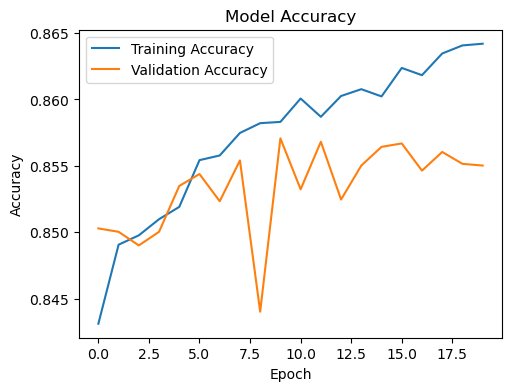

In [13]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

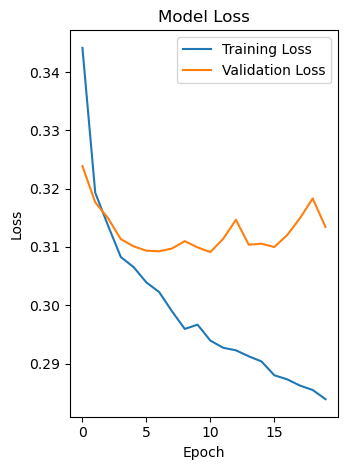

In [14]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()